# 自然语言处理常用参数

## segment_ids

segment_ids 是一个重要的输入，它主要用于区分输入文本中的两个不同部分（通常是两个句子）以便模型能够理解它们之间的关系。

segment_ids 的作用在于：

1. 区分两个句子（句子对输入）  

BERT 预训练时有一个任务叫 Next Sentence Prediction (NSP)，它要求模型判断第二个句子是否是第一个句子的后续句子。因此，当 BERT 接收两个句子时，它需要一种方法来区分这两个句子。这就是 segment_ids 的作用。

对于第一个句子，segment_ids 中的值设置为 0。  
对于第二个句子，segment_ids 中的值设置为 1。  
例如，在训练时，BERT 的输入格式通常是这样的：

input_ids: 句子对的 token IDs  
attention_mask: 标识哪些 token 是有效的（即非 padding）  
segment_ids: 用于标识句子 1 和句子 2  

2. 例子  

假设我们有两个句子：

句子 1: "I love machine learning."  
句子 2: "It is very interesting."  
我们将这两个句子输入 BERT 时，通常会将它们连接起来，形成一个序列：

[I, love, machine, learning, ., SEP, It, is, very, interesting, .]  
SEP 是 BERT 用于分隔句子的特殊符号。
input_ids 将是句子的 token ID 列表（包括特殊符号如 [CLS] 和 [SEP]）。  
segment_ids 将是一个与 input_ids 长度相同的数组，用于标识每个 token 属于哪个句子。  
具体来说，假设我们对上述两个句子的输入进行处理，segment_ids 可能如下所示：  

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  
前 5 个位置（即句子 1）对应的 segment_ids 都是 0。  
后 6 个位置（即句子 2）对应的 segment_ids 都是 1。

# 自然语言处理常见知识

## OOV（未登录词）

OOV（Out-Of-Vocabulary，未登录词）指的是在语言模型或词典中不存在的词汇，通常是指在训练阶段模型未见过的词。当一个模型遇到在训练数据中没有出现过的词时，就会产生OOV问题。OOV是自然语言处理（NLP）中常见的挑战，尤其是在处理开放领域的任务时。

OOV 的成因  
- 词汇限制：大多数NLP模型（特别是基于词典的模型）在训练时使用有限的词汇表（vocabulary）。该词汇表只能包含训练语料中出现过的词。当模型遇到没有出现在该词汇表中的词时，就会出现OOV。
- 新词：新兴的词汇、专有名词、俚语、缩写等可能在训练数据中没有出现。
- 拼写错误：用户在输入时的拼写错误可能导致该词汇不在训练语料的词表中。
- 外语词汇：如果模型仅使用特定语言的训练数据，其他语言的词汇可能也会成为OOV。
  
OOV 处理方法  
针对OOV问题，NLP领域已经提出了多种处理方法。以下是一些常见的策略：

1. 子词级别的表示（Subword Tokenization）  
- Byte Pair Encoding (BPE)：BPE是一种基于子词的分词方法，可以将词汇分解成更小的单元（子词）。这样，尽管某个词没有出现在训练语料中，但它可以被拆分成训练语料中出现过的子词，避免了OOV问题。
- WordPiece：WordPiece是BERT中使用的分词方法，类似于BPE，通过对语料中出现的词进行词频分析，构建一个子词级的词汇表。
- SentencePiece：SentencePiece是一种独立于语言的分词方法，也可以通过BPE或其他算法分割词汇，适应更多的OOV词。
  
优点：通过这种方式，OOV词被拆解成子词或字符级别的表示，从而不再完全依赖词表。 缺点：分割可能会导致词语变得难以理解，特别是对于某些语言结构。

2. 字符级模型（Character-level Models）  
- 一些模型使用字符级别的输入，而不是单独的词汇。例如，字符级卷积神经网络（Char-CNN）或字符级RNN，可以处理未登录词。
- 这种方法将输入文本分解为字符序列，并通过神经网络学习字符的嵌入表示。模型可以根据字符的组合来推测出词汇的含义，即使它未出现在训练集中。

3. 词向量的零初始化（Zero Initialization）  
- 对于未登录的词，可以将其初始化为一个零向量，或者使用随机初始化的向量。这意味着模型会默认这些词的表示为零或随机值，但在训练过程中会根据上下文学习这些OOV词的表示。
  
优点：简单且直接。 缺点：模型需要通过上下文信息来学习OOV词的表示，且在初期的学习过程中表现较差。

4. OOV词的近似（外部词向量或预训练词向量）  
- 如果某个词没有出现在训练语料中，可以使用其他来源的预训练词向量（例如GloVe、FastText或Word2Vec）来获得词向量表示。这些预训练的词向量可能包含更广泛的词汇表，减少OOV的影响。
- FastText特别适合处理OOV问题，因为它通过对词汇的子词进行建模，从而即使是未登录词，也能够从词的子成分推断出词的表示。
  
优点：可以为OOV词提供一个合理的表示，且不需要重新训练模型。 缺点：使用预训练的词向量需要额外的资源，并且可能无法完全适应当前任务。

5. 知识库或外部信息  
- 一些模型使用外部知识库（如WordNet、百科全书等）来查找OOV词的定义和语义信息。这种方法通过引入外部资源来补充训练语料中的缺失词汇。
  
优点：可以借助外部信息有效扩展模型的知识。 缺点：依赖于额外的外部知识库，且无法处理非常具体或罕见的OOV词。

6. 特殊标记（\<UNK>）  
- 在传统的基于词典的模型中，所有未登录词常常被标记为<UNK>（未知词）。<UNK>代表所有不在词汇表中的词，模型将其映射到一个固定的表示。
  
优点：简单直接，处理方便。 缺点：丧失了具体OOV词的信息，可能会降低模型性能。

## 静态词向量和动态词向量

**1、为什么word2vec的词向量是静态的，BERT的词向量是动态的？**

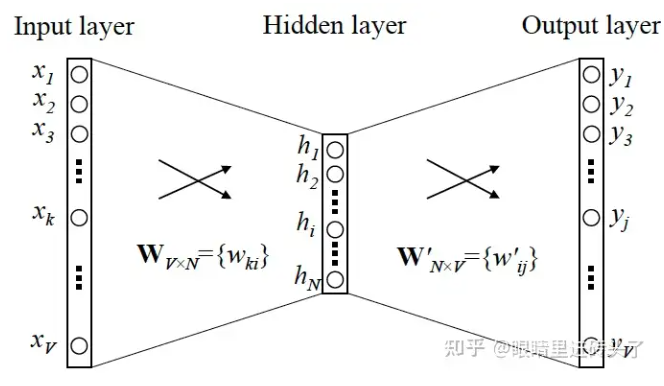
以上这个就是word2vec的训练过程。矩阵W保存下来，这个向量 x*W 就可以用来唯一表示 x.另外说一句，两种词向量 Wx 和 W'y，这也正是论文里所提到的输入向量和输出向量，一般取输入向量来做词向量。其实由于x是one-hot向量，其实就是将one-hot向量中唯一等于1的值的index位置从W矩阵取出来，也就是一个查字典操作（look-up table）,这个取出来的就是词向量代表。因此，为什么说word2vec是静态的？因为当这个模型训练好了之后，这个W就是死的，静态的，任何一个词进来只是做一个查字典取值的操作。

bert在训练时，任务之一是MLM（Mask Language Model）,一个句子中掩盖一个词，然后由其他词去推测此masked token，但它的特征抽取方式用的是transformer，也就是self-attention的特征交互机制。
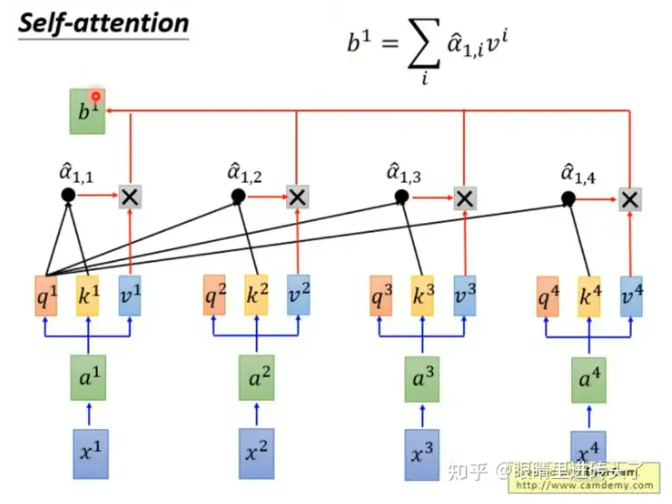
这也就意味着，在算当前词的词向量表达时，该词的特征表达是会跟其他词进行一个特征交互的，最后在此交互基础上，得到自己的词向量表达。这种方式，它是会在去结合上下文的语境的。因此，我们在调用bert做词向量的encoder时，加载不是一个简单的词向量矩阵，而是一个模型，每个句子输入，都得经过一个特征交互，也就是做self-attention的过程，从而得到词向量。

bert词向量是随着上下文输入的不同，而给你不同的词向量表达，这就是bert词向量被称为动态的原因了。

## 自回归模型和自编码模型

**1、为什么GPT模型是自回归模型，BERT是自编码模型？**

语言模型通常被分为两大类：自回归语言模型（Auto-Regressive Language Model，
ARLM）和自编码语言模型（Auto-Encoding Language Model，AELM），如图8-1所示。

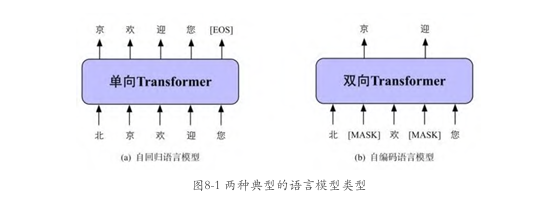

GPT（自回归模型）  
GPT（Generative Pre-trained Transformer）是一种**自回归（autoregressive）模型**，意味着它在生成文本时，每一步都会依赖于前面生成的文本。具体来说：

- 生成方式：GPT通过预测下一个词来生成句子，即给定一部分输入文本，它会根据已有的内容逐步生成下一个词（或标记）。每个词的生成都依赖于之前生成的词。
- 训练目标：在训练过程中，GPT会学习根据上下文来预测下一个词。这是一个**条件概率**的问题，模型需要学会根据前面的词来预测下一个词的概率分布。因此，GPT的训练任务是对输入的句子进行自回归建模，给定前面的词，预测下一个词。

GPT的训练方式使得它非常适合生成任务，比如文本生成、对话系统等，因为它能根据当前的上下文生成连贯的后续文本。

BERT（自编码模型）  
BERT（Bidirectional Encoder Representations from Transformers）是一种**自编码（autoencoding）模型**，它的训练目标与GPT不同，BERT的目标是学习输入文本的上下文表示。

- 生成方式：BERT并不是按顺序生成文本，而是通过对整个输入句子的上下文进行建模来理解文本。它在训练过程中不生成下一个词，而是对输入的句子进行双向编码，也就是考虑左右上下文。
- 训练目标：BERT采用了一个名为**Masked Language Model** (MLM)的训练任务。在训练时，BERT会随机掩盖句子中的一些词（通常是15%的词），然后让模型预测这些被掩盖的词是什么。因为它是双向建模的，所以BERT能够同时使用左右两侧的上下文来预测被掩盖的词。
  
应用场景：由于BERT关注上下文的全局信息，特别适合用于理解任务，比如文本分类、命名实体识别、问答等。

**2、为什么自回归模型是单向，自编码模型是双向？**

GPT（单向注意力）  
模型类型：GPT 是一个**自回归（autoregressive）模型**。  
注意力机制：GPT 使用的是单向注意力（也称为掩蔽自注意力，masked self-attention）。在生成每个词时，模型仅依赖于它左侧（前文）的上下文信息，而无法看到右侧（后文）的词汇。  
实现方式：  
- 在自注意力层中，GPT的注意力矩阵是上三角的，意味着当前词只能关注它之前的词，而无法关注未来的词。
- 对于输入序列 [A, B, C, D, E]，在计算位置i时，GPT只能看到位置1到i的词，无法看到位置i+1到N的词。
  
应用场景：由于其单向性质，GPT特别适合用于生成任务（例如文本生成、对话系统），因为它按顺序生成下一个词。  
简述：GPT的单向注意力限制了模型只能根据左侧的上下文生成文本，而不能看到右侧的内容，符合自回归生成的要求。

BERT（双向注意力）  
模型类型：BERT 是一个**自编码（autoencoding）模型**。  
注意力机制：BERT 使用的是双向注意力（bidirectional attention）。在训练过程中，BERT会同时考虑每个词的左侧和右侧上下文信息，从而获得更完整的语义表示。  
实现方式：  
- BERT的每个位置的词汇表示会基于整个序列的上下文进行计算。即，它会使用全局上下文来理解词语的语义。
- BERT使用的训练任务是掩蔽语言模型（MLM），在训练时，随机选择一些词进行掩蔽（mask），然后通过左侧和右侧的上下文信息来预测这些掩蔽的词。
  
应用场景：由于双向建模，BERT在理解任务中表现出色（例如文本分类、命名实体识别、问答系统），因为它能同时利用上下文的前后信息来进行理解。  
简述：BERT的双向注意力让模型能够同时考虑左侧和右侧的上下文信息，从而更全面地理解输入文本的语义，适合理解任务。

# 预训练模型汇总

## bert-base-chinese

bert-base-chinese 是由 Google 提供的基于 BERT 架构的中文预训练模型，专门针对中文自然语言处理任务进行优化。以下是详细介绍：

1. 模型架构  
模型类型：BERT（Bidirectional Encoder Representations from Transformers）  
大小：Base 版本  
层数：12 层 Transformer 编码器（Encoder）  
隐藏层维度：768  
注意力头数：12 个  
总参数量：约 110M  
2. 预训练任务  
bert-base-chinese 采用两种无监督预训练任务：  
掩蔽语言模型 (Masked Language Model, MLM)：  
随机掩蔽输入文本中的 15% 的词，并让模型预测被掩蔽的词。  
这种双向上下文建模方式让 BERT 在句子中同时捕获前后文信息。  
下一句预测 (Next Sentence Prediction, NSP)：  
输入两句文本，模型预测第二句是否是第一句的真实下一句。这对句子对分类和关系判断任务有帮助。  

3. 预训练数据  
使用了大量的中文语料库，包括：  
中文维基百科  
新闻文本  
其他公开的中文语料  
支持简体中文和部分繁体中文，涵盖了现代汉语的多种语言现象。  
4. 应用场景  
bert-base-chinese 可以用于各种中文自然语言处理任务，通过微调模型在下列任务上获得优秀性能：  
文本分类：情感分析、垃圾邮件检测等。  
命名实体识别 (NER)：识别人名、地名、组织名等。  
问答系统 (QA)：回答用户问题。  
文本生成和填空：生成合理的文本片段或预测缺失部分。  
语义匹配：判断两个句子或短文本之间的关系。  

5. 微调方式  
分类任务：使用 BertForSequenceClassification。  
命名实体识别：使用 BertForTokenClassification。  
问答任务：使用 BertForQuestionAnswering。  
文本填空：使用 BertForMaskedLM。  
或者AutoTokenizer相关接口

6. 优缺点  
优点：  
双向上下文学习，效果优于传统的单向模型（如 GPT）。  
对中文任务进行了专门预训练，效果良好。  
缺点：  
计算资源需求较高，训练和推理时需要较大的显存。  
对长文本处理时，受限于固定的最大序列长度（512）。  

## bert-base-uncased 

bert-base-uncased 是一个预训练的语言模型，属于 BERT（Bidirectional Encoder Representations from Transformers）系列模型之一。它由 Google AI 提出的，用于各种自然语言处理（NLP）任务，如问答、情感分析、文本分类等。以下是 bert-base-uncased 的一些关键特点：

1. BERT 模型架构  
BERT 是基于 Transformer 架构的，特别是采用了其中的编码器部分。Transformer 是一种自注意力（self-attention）机制的模型架构，能够在处理文本时同时考虑上下文信息。BERT 的独特之处在于其双向性，意味着它在处理文本时能够同时考虑句子的左右上下文，而不像传统的语言模型那样仅能从左到右或从右到左生成文本。

2. 模型配置  
bert-base：指的是 BERT 的基础版本。该版本有 12 层 Transformer 编码器，每层有 768 个隐藏单元，总共有 110M（1.1 亿）个参数。  
uncased：指模型在训练过程中对大小写不敏感，意味着在训练数据中，所有的字母都转化为小写字母。例如，“Apple”和“apple”在模型中会被视为相同的单词。

## hfl/chinese-bert-wwm

hfl/chinese-bert-wwm 是由 哈工大（HIT） 和 华为诺亚方舟实验室（Huawei Noah's Ark Lab） 开发的一个中文 BERT 模型，采用了 Whole Word Masking (WWM) 技术。这个模型是对原始 BERT 模型的改进，旨在增强对中文文本的理解能力。

主要特点：  
1. Whole Word Masking (WWM)  
WWM 是对传统 BERT 模型的改进，传统 BERT 使用的是 单个子词掩码（Subword Masking） 技术，即在掩码化过程中只掩盖单个子词（subword）。  
Whole Word Masking 方法则在掩盖一个词时会将该词的所有子词一起掩盖，而不仅仅是一个子词。这种方法更加符合自然语言的语法和词汇结构，特别是在中文中，很多词语是由多个子词构成的，采用 WWM 可以更好地捕捉到词语级的上下文信息，从而提高模型在理解文本时的表现。  
2. 中文预训练模型  
该模型专门为中文文本进行了预训练，相比于使用英语预训练模型（如bert-base-uncased）直接应用于中文，hfl/chinese-bert-wwm 对中文的适配性更强，能够更好地理解中文的语言特征，如字符间的依赖关系和语法结构。
3. 基于 BERT 架构  
hfl/chinese-bert-wwm 基于经典的 BERT（Bidirectional Encoder Representations from Transformers）架构，利用双向 Transformer 来学习上下文信息。  
该模型的输入是由词或子词（token）构成的字符序列，利用 Transformer 的多头自注意力机制来捕捉句子中各个词之间的复杂依赖关系。
4. 预训练任务  
该模型在预训练过程中使用了与 BERT 相同的两大核心任务：  
Masked Language Model (MLM)：随机掩盖输入文本中的一些词，并让模型预测这些被掩盖的词。  
Next Sentence Prediction (NSP)：给定一对句子，模型需要判断第二个句子是否是第一个句子的下一个句子。  
5. 适用任务  
该模型经过微调后，广泛适用于各种中文 NLP 任务，如：  
文本分类  
情感分析  
命名实体识别（NER）  
问答系统（QA）  
关系抽取  
文本匹配等。

## NchuNLP/Chinese-Question-Answering

NchuNLP/Chinese-Question-Answering 是一个基于 BERT 的中文问答模型，旨在处理中文文本中的问题回答任务。这个模型是由南京农业大学（NCHU）团队训练的，并且在中文问答数据集上进行过微调，特别适用于中文阅读理解（SQuAD-like）任务。

模型背景：  
模型架构：该模型基于 Hugging Face 的 Transformers 框架，采用 BERT（Bidirectional Encoder Representations from Transformers）模型进行微调。BERT 是一种预训练语言模型，能够在多个自然语言处理任务中取得优异的表现，尤其是在问答（QA）任务中。  
中文数据集：该模型主要是针对中文问题和中文文本进行训练的，因此在处理中文问答任务时表现较好。

In [2]:
from transformers import BertForQuestionAnswering, BertTokenizer
import torch

# 加载模型和tokenizer
model_name = "NchuNLP/Chinese-Question-Answering"
# model = BertForQuestionAnswering.from_pretrained(model_name)
# tokenizer = BertTokenizer.from_pretrained(model_name)

# BERT常用API

In [1]:
from transformers import Trainer, TrainingArguments

## TrainingArguments

TrainingArguments 是 Hugging Face 的 transformers 库中的一个类，用于配置模型训练的参数。它支持非常多的参数，下面是常见的参数及其描述，列出为表格格式。

参数名称	|描述
---|---
output_dir	|训练和保存模型的输出目录路径。
overwrite_output_dir	|如果输出目录已存在，是否覆盖（默认为 False）。
num_train_epochs	|训练的总 epoch 数。
per_device_train_batch_size	|每个设备（GPU/CPU）上的训练批次大小。
per_device_eval_batch_size	|每个设备上的评估批次大小。
gradient_accumulation_steps	|在执行一次反向传播之前，累积的梯度步数，用于模拟更大的批量大小。
learning_rate	|学习率，控制梯度下降的步长。
weight_decay	|权重衰减，用于正则化。
adam_epsilon	|Adam 优化器的 epsilon 超参数，防止除以零的错误。
max_grad_norm	|梯度裁剪的最大值，用于防止梯度爆炸。
logging_dir	|日志文件保存的目录路径。
logging_steps	|每隔多少步进行一次日志记录。
save_steps	|每隔多少步保存一次模型。
save_strategy	|模型保存策略，可以是 "no", "epoch", 或 "steps"。
evaluation_strategy	|评估策略，值可以是 "no", "epoch", 或 "steps"。
eval_steps	|每隔多少步进行一次评估。
load_best_model_at_end	|是否在训练结束后加载验证集上表现最好的模型。
metric_for_best_model	|用于选择最佳模型的评估指标。可以是 "accuracy", "f1", "loss" 等。
greater_is_better	|是否更高的指标值更好（如准确率是越高越好，而损失是越低越好）。
disable_tqdm	|是否禁用进度条。
logging_first_step	|是否在第一步就记录日志。
skip_memory_metrics	|是否跳过内存相关的度量计算。
report_to	|将训练日志报告到哪些平台，支持 "tensorboard", "mlflow", "comet", "wandb" 等。
dataloader_num_workers	|数据加载器使用的并行线程数。
run_name	|运行的名字，用于跟踪多个实验。
seed	|随机种子。
fp16	|是否启用 16 位浮点数精度（半精度训练），加速训练并减少内存使用。
fp16_opt_level	|设置半精度训练的优化级别，可以是 "O0", "O1", "O2", "O3"。
gradient_checkpointing	|是否启用梯度检查点，节省内存。
eval_accumulation_steps	|在评估时累积的梯度步骤数，避免每个步骤都计算梯度。
max_steps	|训练的最大步数，如果设置了此参数，num_train_epochs 会被忽略。
warmup_steps	|学习率预热的步数，逐步增大学习率。
logging_nan_inf_filter	|是否过滤掉 NaN 和无穷值的日志。
save_total_limit	|限制保存的检查点数量，以避免占用过多硬盘空间。
remove_unused_columns	|是否删除数据集中的未使用列（默认为 True）。

## Trainer

Trainer 类是 Hugging Face 提供的高层 API，用于简化模型的训练和评估过程。以下是 Trainer 类常用参数的列表及说明：

参数名称	|描述
---|---
model	|需要训练的模型（例如，BertForSequenceClassification, BertForTokenClassification 等）。
args	|TrainingArguments 实例，包含训练的配置参数（如学习率、batch size、epoch 等）。
train_dataset	|用于训练的数据集，必须是一个 Dataset 对象。
eval_dataset	|用于评估的数据集，必须是一个 Dataset 对象（可选）。
data_collator	|数据合并器，用于将一个批次的多个样本合并为一个批次，通常是用于 padding 或其它处理。
compute_metrics	|一个用于计算模型性能指标的函数，输入模型预测和真实标签，返回指标字典（例如，{'accuracy': 0.9, 'f1': 0.85}）。
callbacks	|一个可选的回调函数列表，用于自定义训练过程（例如，记录日志、调整学习率等）。
optimizers	|一个元组 (optimizer, scheduler)，用于指定优化器和学习率调度器。
tokenizer	|用于模型输入数据处理的分词器（可选）。
prediction_loss_only	|是否只返回预测损失值。如果设置为 True，则返回的字典只包含损失值（默认为 False）。
preprocessing_num_workers	|数据预处理时使用的并行工作线程数。
group_by_length	|是否将样本按长度分组来进行批量处理。
use_mps_device	|是否使用 Apple Silicon 的 MPS（Metal Performance Shaders）设备。
torchdynamo	|是否启用 TorchDynamo 优化。
deterministic	|是否启用确定性计算（使训练过程可重复）。
sharded_ddp	|是否启用分布式数据并行（Sharded DDP），用于大规模分布式训练。
local_rank	|在分布式训练中，当前进程的 rank（用于多节点训练）。
tpu_num_cores	|在 TPU 上训练时使用的核心数目。
label_smoothing_factor	|标签平滑因子（用于软标签训练，防止模型过度自信）。
adaptor	|在训练过程中使用的额外适配器模型。
metric_for_best_model	|用于评估最佳模型的指标（如 'accuracy', 'f1', 'loss'）。
greater_is_better	|metric_for_best_model 指标是否越大越好。如果设置为 True，则更高的指标值表示更好的模型（如准确率）。
save_strategy	|保存策略，可以选择 "no", "epoch", 或 "steps"，控制何时保存模型。
save_steps	|每隔多少步保存一次模型。
save_total_limit	|限制保存的模型检查点的数量，避免占用过多存储空间。
load_best_model_at_end	|训练结束时是否加载验证集上表现最好的模型。
evaluation_strategy	|评估策略，可以选择 "no", "epoch", 或 "steps"，控制何时评估模型。
eval_steps	|每隔多少步进行一次评估。
logging_dir	|日志保存目录，通常用于 TensorBoard 或其他日志记录工具。
logging_steps	|每隔多少步记录一次日志。
logging_first_step	|是否在第一步就记录日志。
logging_nan_inf_filter	|是否过滤掉包含 NaN 或无穷值的日志。
report_to	|日志报告的平台（支持 'tensorboard', 'mlflow', 'wandb' 等）。
weight_decay	|权重衰减，用于正则化。
adam_epsilon	|Adam 优化器的 epsilon 超参数，防止除以零的错误。
max_grad_norm	|用于梯度裁剪的最大梯度值。
load_best_model_at_end	|是否加载在验证集上表现最好的模型。
seed	|随机种子，用于控制训练的随机性。
torch_dtype	|使用的 PyTorch 数据类型（如 float16, float32）。
fp16	|是否启用 16 位浮点数训练。
fp16_opt_level	|设置半精度训练的优化级别（如 "O0", "O1", "O2", "O3"）。
gradient_accumulation_steps	|累积的梯度步数，模拟更大的批量大小。
gradient_checkpointing	|是否启用梯度检查点，以节省内存。
eval_accumulation_steps	|在评估时累积的梯度步数。
sharded_ddp	|启用 Sharded DDP 训练（适用于分布式训练）。
dataloader_num_workers	|数据加载时的并行工作数。
drop_last	|是否丢弃最后一个不完整的批次（当 batch size 不够时）。

## pipeline

pipeline 是 Hugging Face 提供的一个高层 API，它封装了各种自然语言处理任务的模型推理过程。使用 pipeline 可以很方便地进行任务推理，而无需关心底层实现。主要用于模型微调之后。以下是 pipeline 常用的参数及其简要说明，列出为表格格式：

参数名称	|描述
---|---
task	|指定要执行的任务类型，如 "text-classification", "ner", "question-answering" 等。
model	|预训练的模型或本地模型路径（例如 "bert-base-uncased"）。
tokenizer	|用于文本编码的分词器，通常与模型配套提供（例如，"bert-base-uncased"）。
framework	|使用的框架类型，可以是 "pt"（PyTorch）或 "tf"（TensorFlow），默认根据模型自动选择。
device	|指定推理时使用的设备。-1 表示使用 CPU，0 表示使用 GPU 0，1 表示使用 GPU 1，以此类推。
device_map	|对于多 GPU 环境，指定模型分配到哪些设备。可以是 "auto"（自动分配）或一个具体的设备列表。
revision	|使用的模型版本，可以是模型的 Git 版本、tag 或 commit ID。
use_fast	|是否使用快速分词器（默认为 True）。当使用 fast tokenizer 时，速度更快且支持更多功能。
config	|自定义配置文件或配置对象，通常包含模型的超参数、训练设置等。
return_tensors	|是否返回 torch.Tensor 或 tf.Tensor 类型的输出，默认为 None，即返回的是原始模型输出（例如，字典或列表）。
padding	|控制是否对输入进行 padding。可以是 "longest"、"max_length" 或一个整数值表示最大长度。
max_length	|输入序列的最大长度，输入长度超过该值会进行截断。
truncation	|是否进行截断操作，确保输入不会超出最大长度。如果为 True，输入超过最大长度时会被截断。
batch_size	|批量大小，控制一次处理多少条数据。
stride	|仅在某些任务（如文本生成）中使用，用于控制滑动窗口的步幅，避免序列太长而无法处理。
top_k	|在某些生成任务中，用于限制每次推理时返回的候选词汇数量。
top_p	|用于指定 nucleus sampling 中的累积概率阈值。
temperature	|控制生成的随机性。较低的值（例如 0.7）使输出更确定，而较高的值（例如 1.0）使输出更加随机。
repetition_penalty	|防止生成过程中重复词汇的惩罚因子，较高的值会减少重复出现的单词。
max_new_tokens	|在生成任务中，控制生成的新 token 数量，而不是使用 max_length。
length_penalty	|用于控制生成文本的长度偏好。较大的值会鼓励模型生成更短的文本。
num_return_sequences	|控制每个输入生成多少个输出序列（用于多样化生成）。
clean_up_tokenization_spaces	|是否在解码时清理掉多余的空格。
model_kwargs	|传递给模型的额外关键字参数。

pipeline 支持多种自然语言处理任务，用户可以通过指定不同的 task 来选择不同的任务类型。以下是 Hugging Face pipeline 支持的常见任务列表：

任务名称	|描述
---|---
text-classification	|文本分类任务。用于对文本进行分类，如情感分析、垃圾邮件分类等。
ner	|命名实体识别（NER）。识别文本中的实体，例如人名、地点名、组织名等。
question-answering	|问答任务。根据给定的上下文，回答提出的问题。
text-generation	|文本生成任务。用于生成新的文本，可以用于语言建模、对话生成等。
translation	|翻译任务。将一种语言翻译成另一种语言（例如英语到法语）。
summarization	|文本摘要任务。自动生成给定文本的简短摘要。
fill-mask	|填空任务。模型预测文本中的掩码位置（如[MASK]）。用于测试语言模型的能力。
zero-shot-classification	|零-shot 文本分类任务。可以在没有训练数据的情况下，将文本分配到预定义的标签类别中。
summarization	|生成文本的摘要，支持长文本的简化处理。
conversational	|对话任务。用于对话生成，可以与模型进行交互式对话。
text2text-generation	|生成式文本到文本任务，支持包括翻译、文本生成、摘要等多种功能。
sentence-similarity	|句子相似度任务。用于衡量两个句子的相似度。
document-question-answering	|基于文档的问答任务。在更长的文本（如文章或文档）中回答问题。

pipeline 本身无法直接进行模型的微调，它只是提供了一个简洁的推理接口。如果你想微调 pipeline 模型，你需要：
 
使用 Trainer 对模型进行微调。  
保存微调后的模型。  
使用 pipeline 加载并使用微调后的模型进行推理。